## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Notebook_files/data/house-train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
numeric_colmuns = []
numeric_colmuns.extend(list(data.dtypes[data.dtypes == np.int64].index))
numeric_colmuns.extend(list(data.dtypes[data.dtypes == np.float64].index))

In [4]:
numeric_colmuns.remove('SalePrice')
numeric_colmuns.append('SalePrice')
numeric_colmuns.remove('Id')

In [5]:
numeric_data = pd.DataFrame(data, columns=numeric_colmuns)

In [6]:
numeric_data.head(8)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,320,0,0,700,10,2009,85.0,0.0,1993.0,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,0,0,0,0,8,2007,75.0,186.0,2004.0,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,0,0,0,350,11,2009,NaN,240.0,1973.0,200000


In [7]:
len(numeric_colmuns)

37

In [8]:
numeric_data.tail(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
1450,90,9000,5,5,1974,1974,0,0,896,896,...,0,0,0,0,9,2009,60.0,0.0,NaN,136000
1451,20,9262,8,5,2008,2009,0,0,1573,1573,...,0,0,0,0,5,2009,78.0,194.0,2008.0,287090
1452,180,3675,5,5,2005,2005,547,0,0,547,...,0,0,0,0,5,2006,35.0,80.0,2005.0,145000
1453,20,17217,5,5,2006,2006,0,0,1140,1140,...,0,0,0,0,7,2006,90.0,0.0,NaN,84500
1454,20,7500,7,5,2004,2005,410,0,811,1221,...,0,0,0,0,10,2009,62.0,0.0,2004.0,185000
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,8,2007,62.0,0.0,1999.0,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,0,2,2010,85.0,119.0,1978.0,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,2500,5,2010,66.0,0.0,1941.0,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,0,4,2010,68.0,0.0,1950.0,142125
1459,20,9937,5,6,1965,1965,830,290,136,1256,...,0,0,0,0,6,2008,75.0,0.0,1965.0,147500


In [9]:
numeric_data.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000


In [10]:
numeric_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1452.000000,1379.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,70.049958,103.685262,1978.506164,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,24.284752,181.066207,24.689725,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,21.000000,0.000000,1900.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,59.000000,0.000000,1961.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,69.000000,0.000000,1980.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,80.000000,166.000000,2002.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,313.000000,1600.000000,2010.000000,755000.000000


## Clean the Data

In [11]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
columns_to_fill = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for col in columns_to_fill:
    numeric_data[col] = numeric_data[col].fillna(0)

In [13]:
numeric_data.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,320,0,0,700,10,2009,85.0,0.0,1993.0,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,0,0,0,0,8,2007,75.0,186.0,2004.0,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,0,0,0,350,11,2009,0.0,240.0,1973.0,200000
8,50,6120,7,5,1931,1950,0,0,952,952,...,0,0,0,0,4,2008,51.0,0.0,1931.0,129900
9,190,7420,5,6,1939,1950,851,0,140,991,...,0,0,0,0,1,2008,50.0,0.0,1939.0,118000


In [14]:
non_numeric_columns = [col for col in list(data.columns) if col not in numeric_colmuns]
non_numeric_columns.remove('Id')

non_numeric_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
non_numeric_data = pd.DataFrame(data, columns=non_numeric_columns)

In [16]:
non_numeric_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [17]:
non_numeric_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [18]:
nan_columns = np.any(pd.isna(non_numeric_data), axis=0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [19]:
nan_columns

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [20]:
for col in nan_columns:
    non_numeric_data[col] = non_numeric_data[col].fillna('N/A')

In [21]:
nan_columns = np.any(pd.isna(non_numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [22]:
nan_columns

[]

## Apply Label Encoding to the categorical data

In [23]:
mapping_table = dict()

for col in non_numeric_columns:
    
    le = LabelEncoder()
    
    
    non_numeric_data[col] = le.fit_transform(non_numeric_data[col])
    mapping_table[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [24]:
combined_data = pd.concat([numeric_data, non_numeric_data], axis=1)

In [25]:
combined_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,1,2,5,5,2,3,4,1,8,4
1,20,9600,6,8,1976,1976,978,0,284,1262,...,1,2,5,5,2,3,4,1,8,4
2,60,11250,7,5,2001,2002,486,0,434,920,...,1,2,5,5,2,3,4,1,8,4
3,70,9550,7,5,1915,1970,216,0,540,756,...,5,3,5,5,2,3,4,1,8,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,1,2,5,5,2,3,4,1,8,4
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,1,3,5,5,2,3,2,1,8,4
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,1,2,5,5,2,3,0,3,8,4
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,1,3,5,5,2,3,4,1,8,4


In [26]:
X_combined = combined_data.drop(columns=['SalePrice'])
y_combined = combined_data['SalePrice']

## Split data into train / val set using the 80/20 rule

In [27]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

In [28]:
scaler_X = StandardScaler()
X_train_combined_scaled = scaler_X.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_X.transform(X_test_combined)


y_train_combined = y_train_combined.values.reshape(-1, 1)
y_test_combined = y_test_combined.values.reshape(-1, 1)

## MLP Model Development

In [29]:

# class MLPRegressor(nn.Module):
#     def __init__(self, input_size):
#         super(MLPRegressor, self).__init__()
#         self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(128, 64)          # Second hidden layer
#         self.fc3 = nn.Linear(64, 32)           # Third hidden layer
#         self.fc4 = nn.Linear(32, 1)            # Output layer

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x


# class TwoLayerMLPRegressor(nn.Module):
#     def __init__(self, input_size):
#         super(TwoLayerMLPRegressor, self).__init__()
#         self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(128, 1)           # Output layer

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


class FiveLayerMLPRegressor(nn.Module):
    def __init__(self, input_size):
        super(FiveLayerMLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)          # Second hidden layer
        self.fc3 = nn.Linear(64, 32)           # Third hidden layer
        self.fc4 = nn.Linear(32, 16)           # Fourth hidden layer
        self.fc5 = nn.Linear(16, 1)            # Output layer
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x



input_size = X_train_combined_scaled.shape[1]
model = FiveLayerMLPRegressor(input_size)

# Loss and optimizer
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_combined_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_combined, dtype=torch.float32)

## Training on the Housing Dataset

Epoch 1/5000, Train Loss: 38885621760.0000, Val Loss: 39653986304.0000, Val RMSE: 199133.0938
Epoch 2/5000, Train Loss: 38885564416.0000, Val Loss: 39653871616.0000, Val RMSE: 199132.7812
Epoch 3/5000, Train Loss: 38885445632.0000, Val Loss: 39653617664.0000, Val RMSE: 199132.1562
Epoch 4/5000, Train Loss: 38885191680.0000, Val Loss: 39653117952.0000, Val RMSE: 199130.9062
Epoch 5/5000, Train Loss: 38884687872.0000, Val Loss: 39652208640.0000, Val RMSE: 199128.6250
Epoch 6/5000, Train Loss: 38883774464.0000, Val Loss: 39650619392.0000, Val RMSE: 199124.6406
Epoch 7/5000, Train Loss: 38882185216.0000, Val Loss: 39647989760.0000, Val RMSE: 199118.0469
Epoch 8/5000, Train Loss: 38879567872.0000, Val Loss: 39643828224.0000, Val RMSE: 199107.5781
Epoch 9/5000, Train Loss: 38875422720.0000, Val Loss: 39637467136.0000, Val RMSE: 199091.6094
Epoch 10/5000, Train Loss: 38869114880.0000, Val Loss: 39628046336.0000, Val RMSE: 199067.9531
Epoch 11/5000, Train Loss: 38859788288.0000, Val Loss: 3961

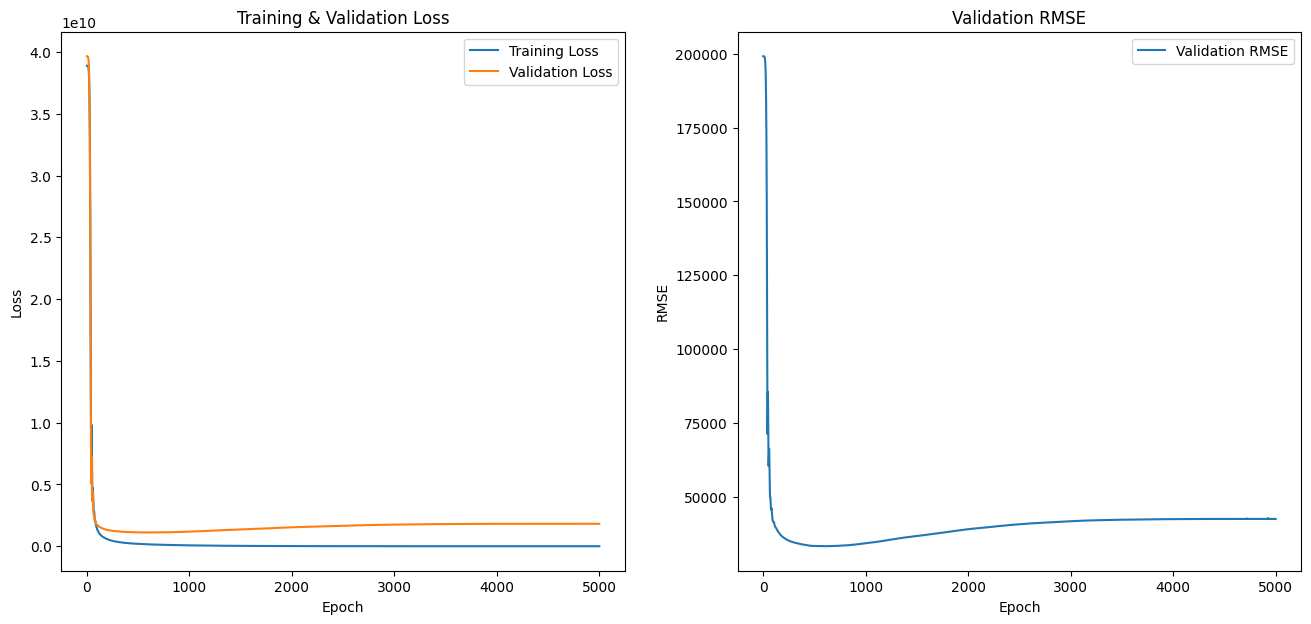

In [30]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Store losses and RMSE for plotting
train_losses = []
val_losses = []
rmse_scores = []
num_epochs = 5000

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    train_outputs = model(X_train_tensor)
    train_loss = criterion(train_outputs, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

        # Inverse transform and calculate RMSE for validation
        y_pred_inv = val_outputs.numpy()  # No need for inverse scaling
        y_test_inv = y_test_tensor.numpy()  # No need for inverse scaling
        rmse = calculate_rmse(y_test_inv, y_pred_inv)
        rmse_scores.append(rmse)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val RMSE: {rmse:.4f}')

# Plotting training and validation losses, and RMSE
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rmse_scores, label='Validation RMSE')
plt.title('Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.show()

## Now Use the OneHotEncoder for the categorical(non-numeric data)

In [31]:
ohe = OneHotEncoder(sparse=False)

non_numeric_encoded = ohe.fit_transform(non_numeric_data)
columns = ohe.get_feature_names(non_numeric_columns)
non_numeric_encoded_df = pd.DataFrame(non_numeric_encoded, columns=columns)

final_data_encoded = pd.concat([numeric_data.reset_index(drop=True), non_numeric_encoded_df.reset_index(drop=True)], axis=1)

In [32]:
final_data_encoded.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,60,8450,7,5,2003,2003,706,0,150,856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
X_combined = final_data_encoded.drop(columns=['SalePrice'])
y_combined = final_data_encoded['SalePrice']


X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

In [34]:
scaler_X = StandardScaler()
X_train_combined_scaled = scaler_X.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_X.transform(X_test_combined)


y_train_combined = y_train_combined.values.reshape(-1, 1)
y_test_combined = y_test_combined.values.reshape(-1, 1)

In [35]:
input_size = X_train_combined_scaled.shape[1]
model = FiveLayerMLPRegressor(input_size)

# Loss and optimizer
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_combined_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_combined, dtype=torch.float32)

In [ ]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Store losses and RMSE for plotting
train_losses = []
val_losses = []
rmse_scores = []
num_epochs = 5000

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    train_outputs = model(X_train_tensor)
    train_loss = criterion(train_outputs, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

        # Inverse transform and calculate RMSE for validation
        y_pred_inv = val_outputs.numpy()  # No need for inverse scaling
        y_test_inv = y_test_tensor.numpy()  # No need for inverse scaling
        rmse = calculate_rmse(y_test_inv, y_pred_inv)
        rmse_scores.append(rmse)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val RMSE: {rmse:.4f}')

# Plotting training and validation losses, and RMSE
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rmse_scores, label='Validation RMSE')
plt.title('Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.show()

Epoch 1/5000, Train Loss: 38885552128.0000, Val Loss: 39653879808.0000, Val RMSE: 199132.8125
Epoch 2/5000, Train Loss: 38885453824.0000, Val Loss: 39653638144.0000, Val RMSE: 199132.2031
Epoch 3/5000, Train Loss: 38885212160.0000, Val Loss: 39653052416.0000, Val RMSE: 199130.7344
Epoch 4/5000, Train Loss: 38884622336.0000, Val Loss: 39651794944.0000, Val RMSE: 199127.5781
Epoch 5/5000, Train Loss: 38883360768.0000, Val Loss: 39649386496.0000, Val RMSE: 199121.5312
Epoch 6/5000, Train Loss: 38880931840.0000, Val Loss: 39645126656.0000, Val RMSE: 199110.8438
Epoch 7/5000, Train Loss: 38876651520.0000, Val Loss: 39638020096.0000, Val RMSE: 199093.0000
Epoch 8/5000, Train Loss: 38869528576.0000, Val Loss: 39626739712.0000, Val RMSE: 199064.6562
Epoch 9/5000, Train Loss: 38858215424.0000, Val Loss: 39609479168.0000, Val RMSE: 199021.2969
Epoch 10/5000, Train Loss: 38840901632.0000, Val Loss: 39583887360.0000, Val RMSE: 198957.0000
Epoch 11/5000, Train Loss: 38815248384.0000, Val Loss: 3954